# Supercritical Steam Cycle Example

This example uses Jupyter Lab or Jupyter notebook, and demonstrates a supercritical pulverized coal (SCPC) steam cycle model.  See the ```supercritical_steam_cycle.py``` to see more information on how to assemble a power plant model flowsheet. Code comments in that file will guide you through the process.

## Model Description

The example model doesn't represent any particular power plant, but should be a reasonable approximation of a typical plant.  The gross power output is about 620 MW.  The process flow diagram (PFD) can be shown using the code below. The initial PFD contains spaces for model results, to be filled in later.

To get a more detailed look at the model structure, you may find it useful to review ```supercritical_steam_cycle.py``` first. Although there is no detailed boiler model, there are constraints in the model to complete the steam loop through the boiler and calculate boiler heat input to the steam cycle.  The efficiency calculation for the steam cycle doesn't account for heat loss in the boiler, which would be a result of a more detailed boiler model.

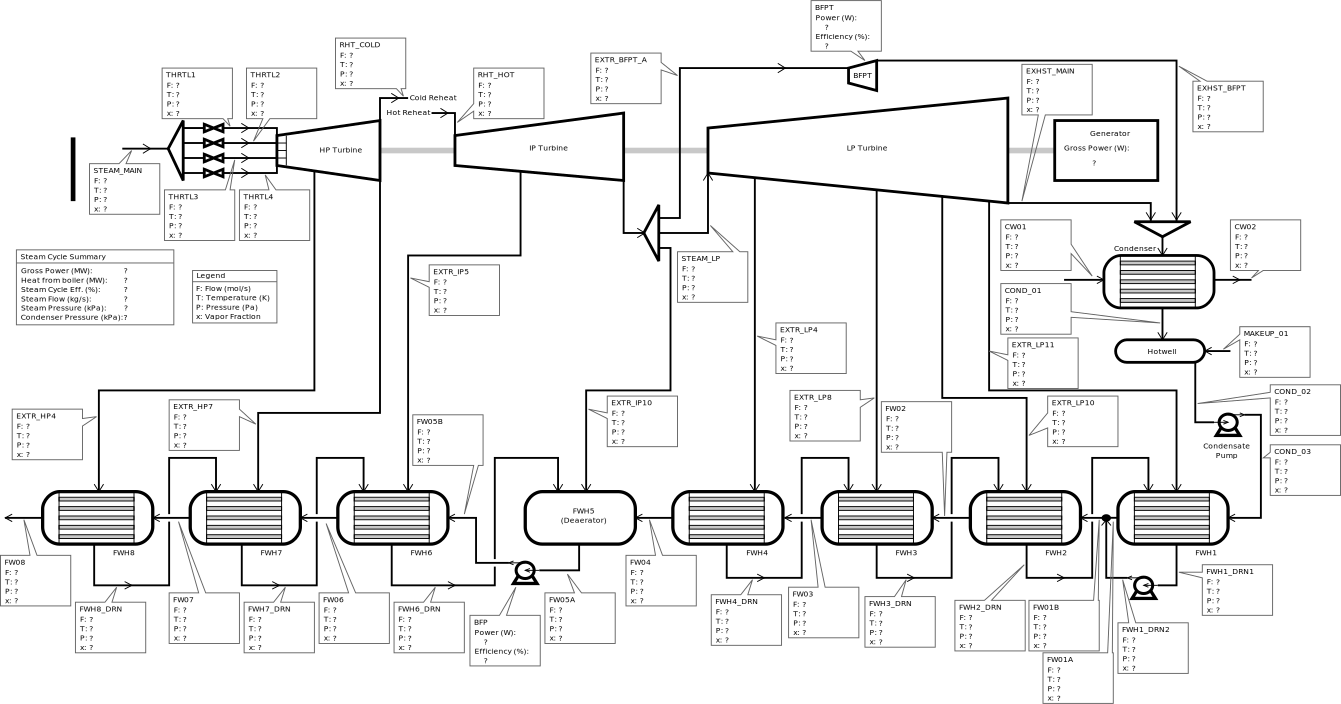

In [1]:
# pkg_resources is used here to get the svg information from the 
# installed IDAES package

import pkg_resources
from IPython.display import SVG, display

# Get the contents of the PFD (which is an svg file) 
init_pfd = pkg_resources.resource_string(
    "idaes.models_extra.power_generation.flowsheets.supercritical_steam_cycle",
    "supercritical_steam_cycle.svg"
)

# Make the svg contents into an SVG object and display it.
display(SVG(init_pfd))

## Initialize the steam cycle flowsheet

This example is part of the ```idaes``` package, which you should have installed.  To run the example, the example flowsheet is imported from the ```idaes``` package. When you write your own model, you can import and run it in whatever way is appropriate for you.  The Pyomo environment is also imported as ```pyo```, providing easy access to Pyomo functions and classes.

The supercritical flowsheet example main function returns a Pyomo concrete mode (m) and a solver object (solver).  The model is also initialized by the ```main()``` function.

In [2]:
import pyomo.environ as pyo
from idaes.models_extra.power_generation.flowsheets.supercritical_steam_cycle import (
    main,
    create_stream_table_dataframe,
    pfd_result,
)
    
m, solver = main()

2022-09-16 12:10:54 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.turb.inlet_stage[1].control_volume.work
2022-09-16 12:10:54 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.turb.inlet_stage[2].control_volume.work
2022-09-16 12:10:54 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.turb.inlet_stage[3].control_volume.work
2022-09-16 12:10:54 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.turb.inlet_stage[4].control_volume.work
2022-09-16 12:10:54 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.turb.hp_stages[1].control_volume.work
2022-09-16 12:10:55 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.turb.hp_stages[2].control_volume.work
2022-09-16 12:10:55 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.turb.hp_stages[3].control_volume.work
2022-09-16 12:10:55 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.turb.hp_stages[4].control_volume.work
2022-09-

2022-09-16 12:10:56 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.bfpt.control_volume.work
2022-09-16 12:10:56 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.fwh6.condense.overall_heat_transfer_coefficient[0.0]
2022-09-16 12:10:56 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.fwh6.condense.area
2022-09-16 12:10:56 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.fwh6.desuperheat.hot_side.heat
2022-09-16 12:10:56 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.fwh6.desuperheat.cold_side.heat
2022-09-16 12:10:56 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.fwh6.desuperheat.overall_heat_transfer_coefficient[0.0]
2022-09-16 12:10:56 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.fwh6.desuperheat.area
2022-09-16 12:10:56 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.fwh6.cooling.hot_side.heat
2022-09-16 12:10:56 [WARNING] idaes.core.util.scaling: 

2022-09-16 12:11:00 [INFO] idaes.init.fs.turb.ip_split[10]: Initialization Complete: optimal - Optimal Solution Found
2022-09-16 12:11:01 [INFO] idaes.init.fs.turb.lp_split[4]: Initialization Complete: optimal - Optimal Solution Found
2022-09-16 12:11:01 [INFO] idaes.init.fs.turb.lp_split[8]: Initialization Complete: optimal - Optimal Solution Found
2022-09-16 12:11:01 [INFO] idaes.init.fs.turb.lp_split[10]: Initialization Complete: optimal - Optimal Solution Found
2022-09-16 12:11:01 [INFO] idaes.init.fs.turb.lp_split[11]: Initialization Complete: optimal - Optimal Solution Found
2022-09-16 12:11:01 [INFO] idaes.init.fs.turb.outlet_stage: Initialization Complete (Outlet Stage): optimal - Optimal Solution Found
2022-09-16 12:11:02 [INFO] idaes.init.Steam Cycle Model: Full turbine solve complete: optimal - Optimal Solution Found
2022-09-16 12:11:03 [DEBUG] idaes.solve.fs.bfpt: Ipopt 3.13.2: nlp_scaling_method=gradient-based
2022-09-16 12:11:03 [DEBUG] idaes.solve.fs.bfpt: tol=1e-06
2022

2022-09-16 12:11:04 [DEBUG] idaes.solve.fs.fwh1_pump: Ipopt is released as open source code under the Eclipse Public License (EPL).
2022-09-16 12:11:04 [DEBUG] idaes.solve.fs.fwh1_pump: For more information visit http://projects.coin-or.org/Ipopt
2022-09-16 12:11:04 [DEBUG] idaes.solve.fs.fwh1_pump: This version of Ipopt was compiled from source code available at
2022-09-16 12:11:04 [DEBUG] idaes.solve.fs.fwh1_pump: https://github.com/IDAES/Ipopt as part of the Institute for the Design of
2022-09-16 12:11:04 [DEBUG] idaes.solve.fs.fwh1_pump: Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
2022-09-16 12:11:04 [DEBUG] idaes.solve.fs.fwh1_pump: Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.
2022-09-16 12:11:04 [DEBUG] idaes.solve.fs.fwh1_pump: This version of Ipopt was compiled using HSL, a collection of Fortran codes
2022-09-16 12:11:04 [DEBUG] idaes.solve.fs.fwh1_pump: for large-scale scientific computation.  All technical papers, sa

2022-09-16 12:11:05 [INFO] idaes.init.fs.fwh3.cooling.cold_side: Initialization Complete
2022-09-16 12:11:06 [INFO] idaes.init.fs.fwh3.cooling: Initialization Completed, optimal - Optimal Solution Found
2022-09-16 12:11:07 [INFO] idaes.init.fs.fwh3: Condensing hot side inlet delta T = 20.20977940396964
2022-09-16 12:11:07 [INFO] idaes.init.fs.fwh3: Condensing hot side outlet delta T = 24.50640142516307
2022-09-16 12:11:07 [INFO] idaes.init.fs.fwh3: Steam Flow = 217.46248742402284
2022-09-16 12:11:07 [INFO] idaes.init.fs.fwh3: Initialization Complete: optimal - Optimal Solution Found
2022-09-16 12:11:07 [INFO] idaes.init.fs.fwh4.desuperheat.hot_side: Initialization Complete
2022-09-16 12:11:07 [INFO] idaes.init.fs.fwh4.desuperheat.cold_side: Initialization Complete
2022-09-16 12:11:07 [INFO] idaes.init.fs.fwh4.desuperheat: Initialization Completed, optimal - Optimal Solution Found
2022-09-16 12:11:07 [INFO] idaes.init.fs.fwh4.condense.hot_side: Initialization Complete
2022-09-16 12:11:0

Inside the model, there is a subblock ```fs```.  This is an IDAES flowsheet model, which contains the supercritical steam cycle model. In the flowsheet, the model called ```turb``` is a multistage turbine model.  The turbine model contains an expression for total power, ```power```.  In this case the model is steady-state, but all IDAES models allow for dynamic simulation, and contain time indexes.  Power is indexed by time, and only the "0" time point exists.  By convention, in the IDAES framework, power going into a model is positive, so power produced by the turbine is negative.  

The property package used for this model uses SI (mks) units of measure, so the power is in Watts. Here a function is defined which can be used to report power output in MW.

In [3]:
# Define a function to report gross power output in MW
def gross_power_mw(model):
    # pyo.value(m.fs.turb.power[0]) is the power consumed in Watts
    return -pyo.value(model.fs.turb.power[0])/1e6

# Show the gross power
gross_power_mw(m)

622.3898483126238

## Change the model inputs

The turbine in this example simulates partial arc admission with four arcs, so there are four throttle valves.  For this example, we will close one of the valves to 25% open, and observe the result.

In [4]:
m.fs.turb.throttle_valve[1].valve_opening[:].value = 0.25

Next, we re-solve the model using the solver created by the ```supercritical_steam_cycle.py``` script.

In [5]:
solver.solve(m, tee=True)

Ipopt 3.13.2: nlp_scaling_method=gradient-based
tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 858, 'Number of variables': 858, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.13.2\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 71.89569520950317}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

Now we can check the gross power output again.

In [6]:
gross_power_mw(m)

594.6647647855602

## Creating a PFD with results and a stream table

A more detailed look at the model results can be obtained by creating a stream table and putting key results on the PFD.  Of course, any unit model or stream result can be obtained from the model.

In [7]:
# Create a Pandas dataframe with stream results
df = create_stream_table_dataframe(streams=m._streams, orient="index")

# Create a new PFD with simulation results
res_pfd = pfd_result(m, df, svg=init_pfd)

    idaes.core.util.tags.svg_tag  (deprecated in 1.12) (called from
    /tmp/ipykernel_63004/3673973399.py:5)
    arguments are deprecated use tag_group instead.  (deprecated in 1.12)
    (called from /home/andrew/idaes/idaes-pse/idaes/core/util/misc.py:104)


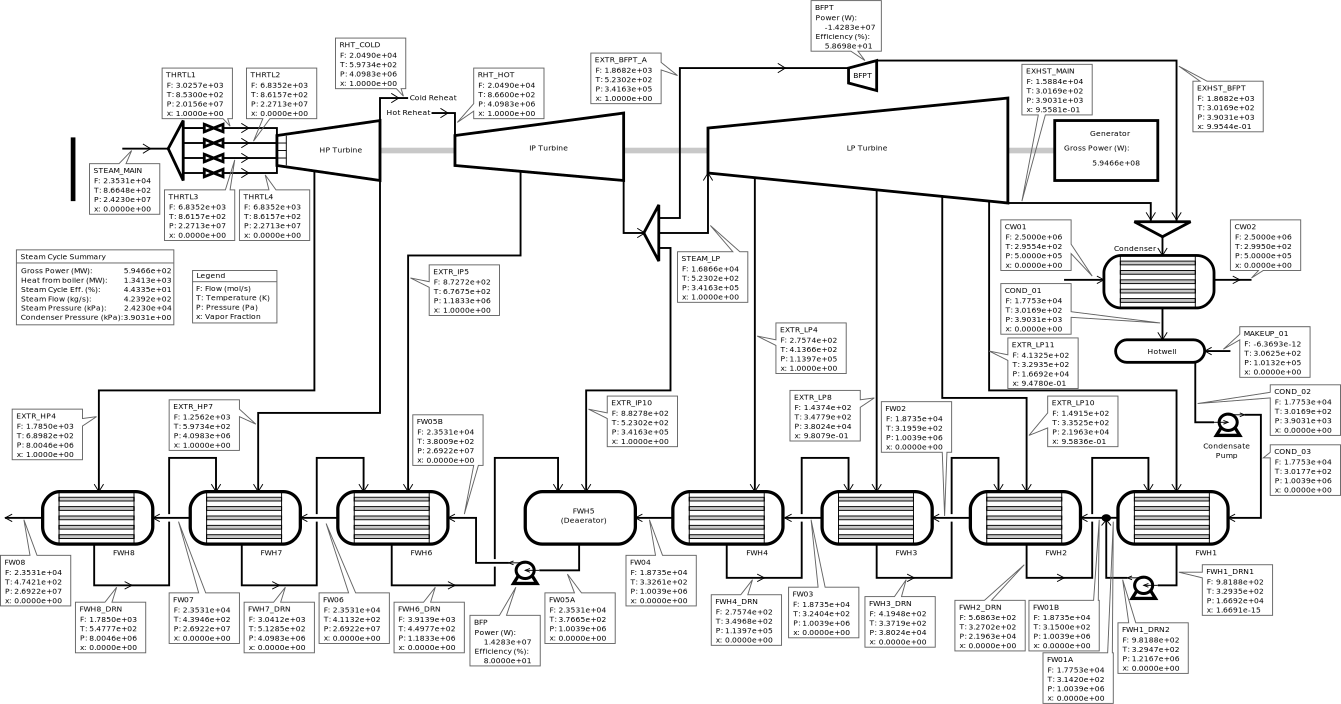

In [8]:
# Display PFD with results.
display(SVG(res_pfd))

In [9]:
# Display the stream table.
df

,Molar Flow (mol/s),Mass Flow (kg/s),T (K),P (Pa),Vapor Fraction,Molar Enthalpy (J/mol) Vap,Molar Enthalpy (J/mol) Liq
Units,mole / second,kilogram / second,kelvin,pascal,dimensionless,joule / mole,joule / mole
COND_01,17752.70068,319.819874,301.6878,3903.144351,0.0,45991.302534,2155.011325
COND_02,17752.70068,319.819874,301.6878,3903.144351,0.0,45991.302534,2155.011325
COND_03,17752.70068,319.819874,301.768936,1003903.144351,0.0,-881196.396142,2177.614995
CW01,2500000,45038.2,295.536846,500000,0.0,36333.61509,1700.0
CW02,2500000.0,45038.2,299.504702,500000.0,0.0,-14890979.550751,1998.827258
EXHST_BFPT,1868.206109,33.656256,301.6878,3903.144351,0.995438,45991.302534,2155.011325
EXHST_MAIN,15884.494571,286.163617,301.6878,3903.144351,0.955809,45991.302534,2155.011325
EXTR_BFPT_A,1868.206109,33.656256,523.019746,341628.77898,1.0,53436.791867,19552.403652
EXTR_HP4,1784.96968,32.156729,689.818053,8004578.367447,1.0,57382.398006,128555.70395
